We want to solve the two-dimensional time-independent Schrodinger equation in a square for any potential:

\begin{equation*}
    - \frac{\hbar}{2 m} \left( \frac{\partial ^ 2 \psi (x, y)}{\partial x ^ 2} + \frac{\partial ^ 2 \psi (x, y)}{\partial y ^ 2} \right) + V(x, y) \, \psi (x, y) = E \, \psi(x, y) \quad \text{for} \quad (x, y) \in [0, 1] \times [0, 1]
\end{equation*}

with the boundary condition $\psi (x, y) = 0$ on the edge

In [1]:
# importing libraries
from numpy import linspace, meshgrid, exp, ones, array
from scipy.sparse import spdiags, kronsum, diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [2]:
# Plotter function 2D and 3D
def plotter(n):
    
    global x, y, eigenvectors, eigenvalues, N

    psi = eigenvectors.T[n].reshape(N, N)
    
    fig = plt.figure(figsize = (14, 7))
    
    # Creating a 2D subplot
    ax1 = fig.add_subplot(121)
    c = ax1.contourf(x, y, psi ** 2, 200, cmap = "inferno")
    fig.colorbar(c, ax = ax1)
    ax1.set_title(f"Probability density for n = {n}", fontweight = "bold", fontsize = 14)
    ax1.set_xlabel("X", fontweight = "bold", fontsize = 10)
    ax1.set_ylabel("Y", fontweight = "bold", fontsize = 10)
    ax1.grid(False)

    # Creating a 3D subplot
    ax2 = fig.add_subplot(122, projection = "3d")
    surf = ax2.plot_surface(x, y, psi, cmap = "magma", edgecolor = "none", antialiased = True, shade = True)
    ax2.set_title(f"Wave function for n = {n} \n E_{n} = {round(eigenvalues[n], 6)}", fontweight = "bold", fontsize = 14)
    ax2.set_xlabel("X", fontweight = "bold", fontsize = 10)
    ax2.set_ylabel("Y", fontweight = "bold", fontsize = 10)
    ax2.set_zticks([])

    fig.colorbar(surf, ax = ax2)

    plt.show()

In [3]:
# Number of subdivisions
N = 300

In [4]:
# Creating the mesh
x = linspace(0, 1, N)
y = linspace(0, 1, N)

x, y = meshgrid(x, y)

In [5]:
# Defining the potential within the square
def potential(x, y):
    return exp(- ((x - 0.5) ** 2 + (y - 0.5) ** 2) / (2 * 0.05 ** 2))

V = potential(x, y)

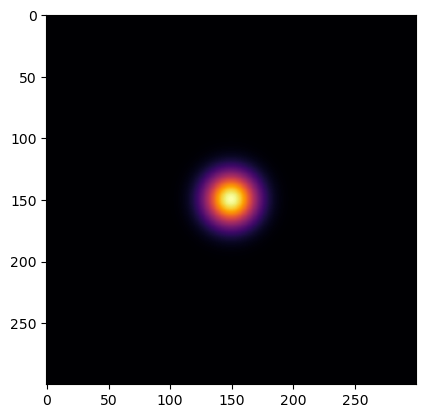

In [6]:
# Showing the potential
plt.imshow(V, cmap = "inferno")
plt.show()

In [7]:
# Preparing the matrices
diagonal = ones([N])
diagonals = array([diagonal, -2 * diagonal, diagonal])
D = spdiags(diagonals, array([- 1, 0, 1]), N, N)
T = - 1 / 2 * kronsum(D, D)
U = diags(V.reshape(N ** 2), (0))
H = T + U

In [8]:
# Solving the equation and getting the first 50 eigenvalues
K = 50
eigenvalues, eigenvectors = eigsh(H, k = K + 1, which = 'SM')

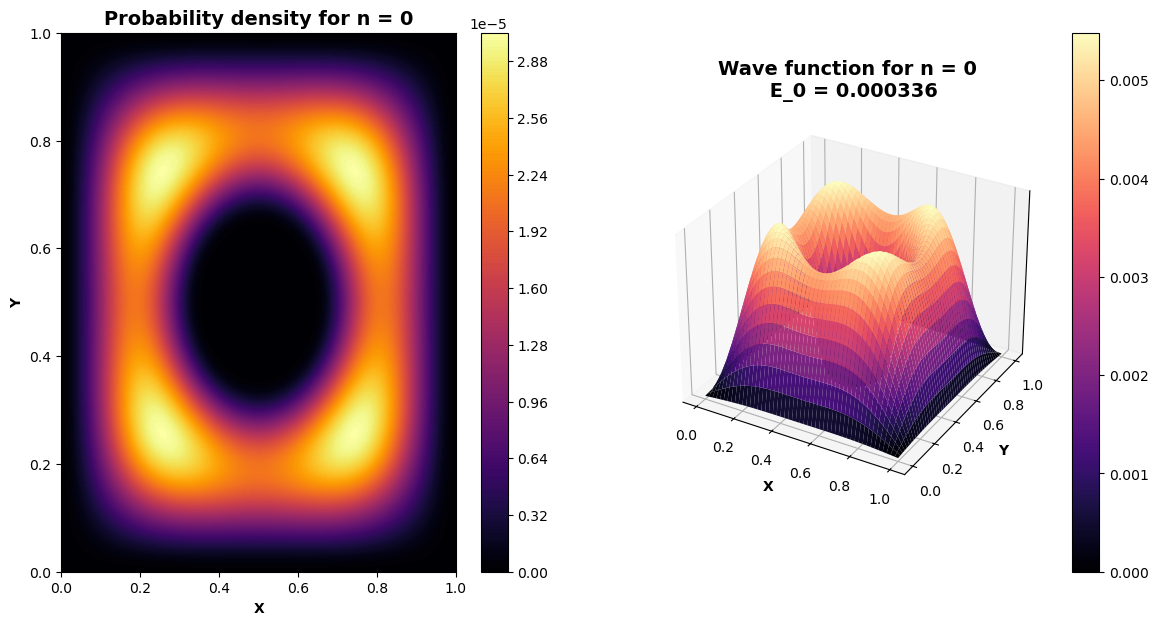

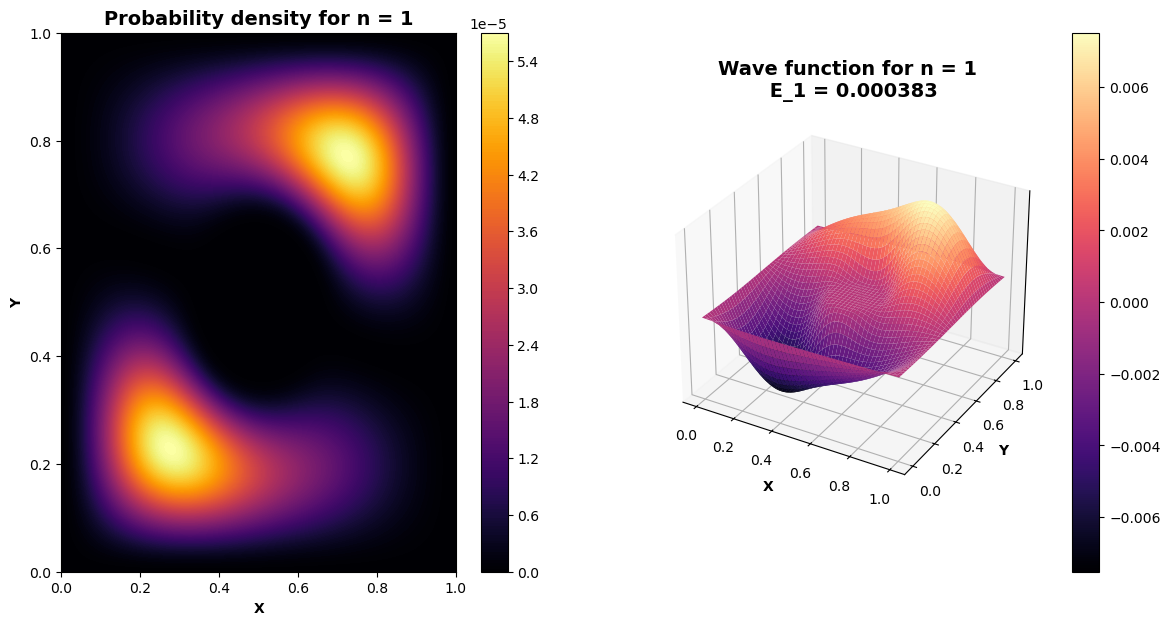

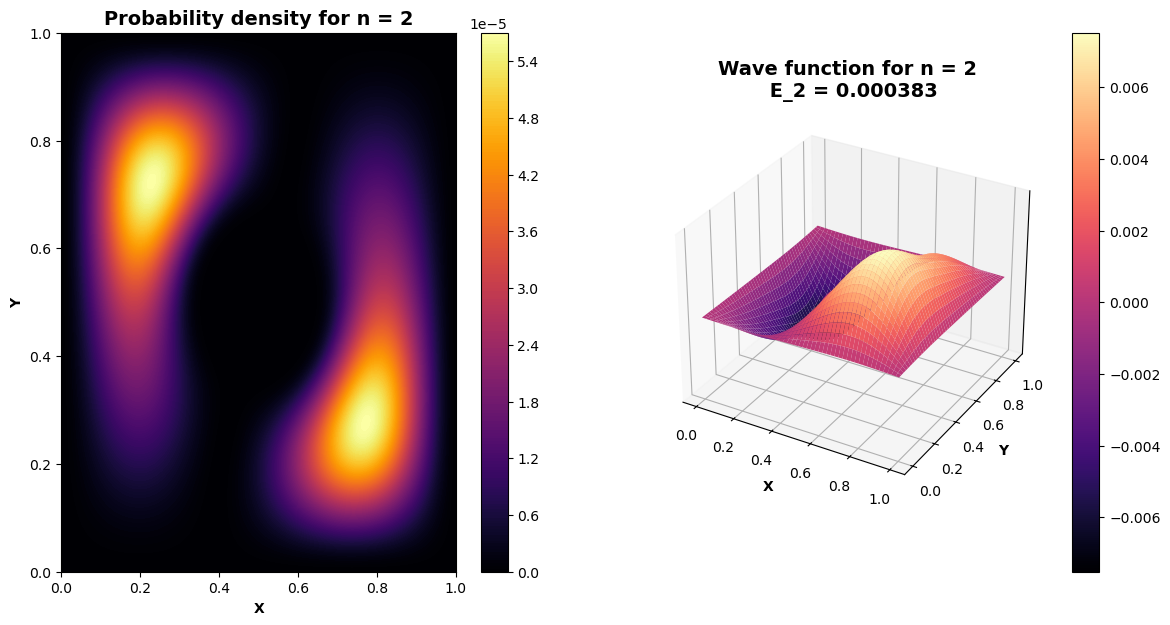

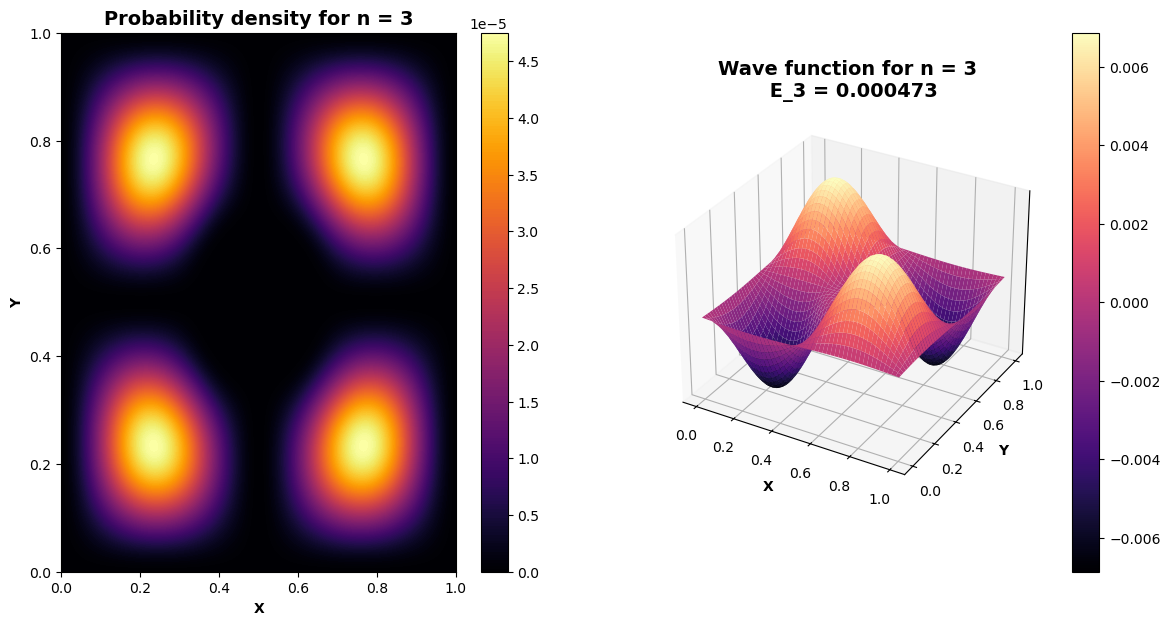

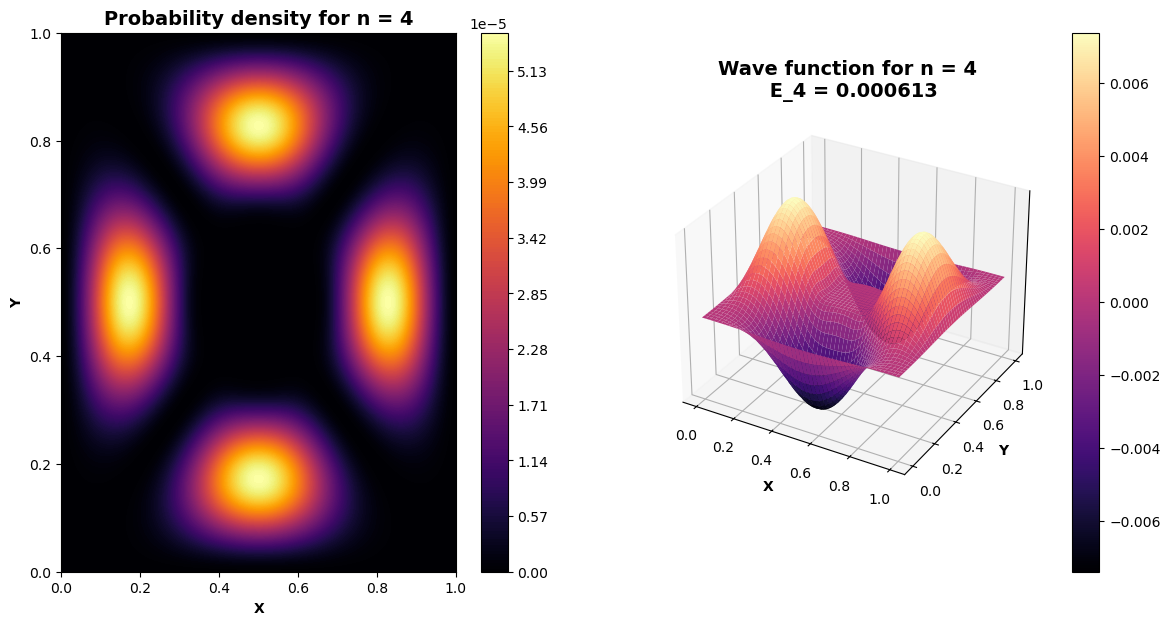

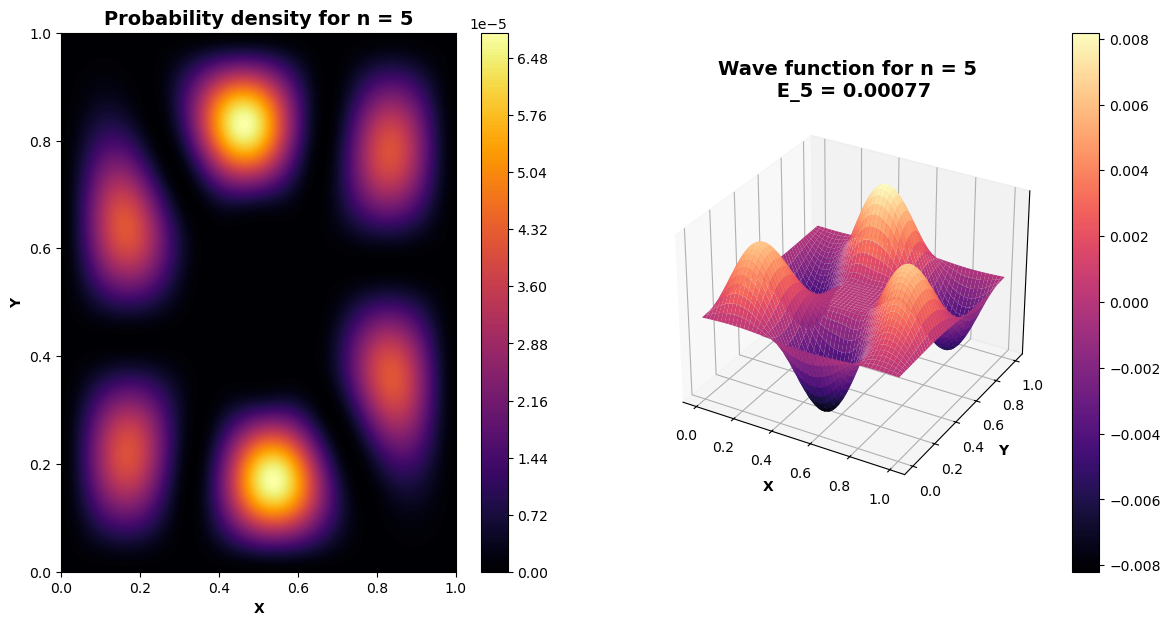

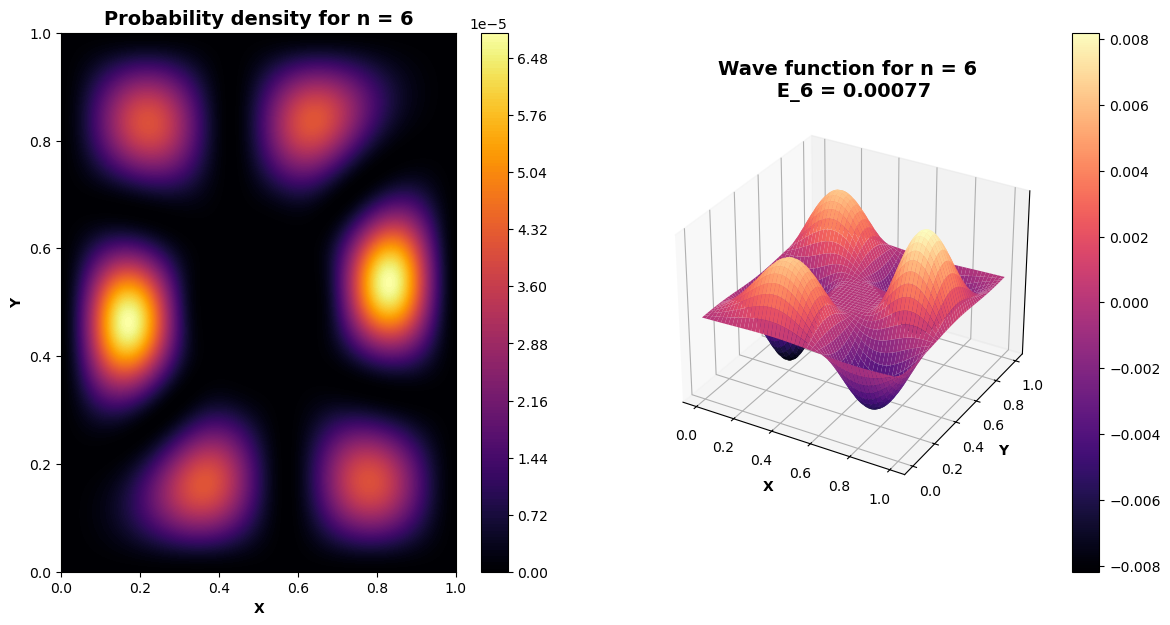

[None, None, None, None, None, None, None]

In [9]:
# plotting the results
[plotter(j) for j in range(0, 7)]

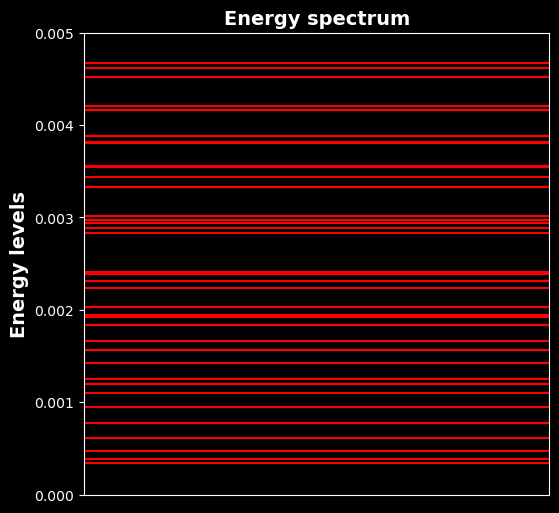

In [12]:
plt.style.use("dark_background")
plt.figure(figsize = (6, 6))
[plt.axhline(eigenvalues[j], color = "red") for j in range(0, K + 1)]
plt.xticks([])
plt.ylim(0, 0.005)
plt.title("Energy spectrum", fontweight = "bold", fontsize = 14)
plt.ylabel("Energy levels", fontweight = "bold", fontsize = 14)
plt.show()